In [1]:
from value import Value, draw_dot, graph_size

# Neural Networs

In [2]:
import random

class Neuron:
    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(0)
        
    def __call__(self, x):
        # return tanh(w * x + b)
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out

In [3]:
n = Neuron(3)
n.w, n.b

([Value(, data=0.6806325800005746, grad=0.0),
  Value(, data=0.5746509038238283, grad=0.0),
  Value(, data=0.541007770175407, grad=0.0)],
 Value(, data=0, grad=0.0))

In [4]:
n([1, -1, 2])

Value(, data=0.829956693652459, grad=0.0)

In [5]:
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs

In [6]:
l = Layer(5, 3)

In [11]:
for neuron in l.neurons:
    print(neuron.w)

[Value(, data=0.8006272562383894, grad=0.0), Value(, data=-0.7622718509723183, grad=0.0), Value(, data=0.9317015425657662, grad=0.0), Value(, data=0.38072214068964194, grad=0.0), Value(, data=-0.543529810918302, grad=0.0)]
[Value(, data=0.9631846435199947, grad=0.0), Value(, data=0.6901006147893447, grad=0.0), Value(, data=0.5708239782258118, grad=0.0), Value(, data=0.09072987268504051, grad=0.0), Value(, data=-0.9527683207100006, grad=0.0)]
[Value(, data=-0.7500969458785041, grad=0.0), Value(, data=-0.6464712231452696, grad=0.0), Value(, data=0.7624388879532031, grad=0.0), Value(, data=-0.9794775168785517, grad=0.0), Value(, data=0.0857269972229926, grad=0.0)]


In [12]:
l([1, -1, 2, 0, 0.9])

[Value(, data=0.9943939589335665, grad=0.0),
 Value(, data=0.5059271258268353, grad=0.0),
 Value(, data=0.9048598548636262, grad=0.0)]

In [13]:
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs if len(outs) > 1 else outs[0]

In [14]:
l = Layer(5, 1)
l([1, -1, 2, 0, 0.9])

Value(, data=-0.9071630861348932, grad=0.0)

In [15]:
class MLP:
    
    def __init__(self, nin, nout):
        sz = [nin] + nout
        self.layers = [Layer(zi, zo) for zi, zo in zip(sz, sz[1:])]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x

In [16]:
m = MLP(3, [4, 4, 1])
inp = [-1, 0.5, 3]
m(inp)

Value(, data=-0.8220872154600553, grad=0.0)

With all the available tools, lets train the network with a simple dataset:

In [17]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, -1.0],
    [1.0, 1.0, -1.0]
]
ys = [1.0, -1.0, -1.0, 1.0] # targets

In [18]:
ypred = [m(x) for x in xs]
ypred

[Value(, data=-0.07884561934094564, grad=0.0),
 Value(, data=-0.6310294225685947, grad=0.0),
 Value(, data=0.56578210016483, grad=0.0),
 Value(, data=0.24603003534068194, grad=0.0)]

In [19]:
[(yout-ygt)**2 for ygt, yout in zip(ys, ypred)]

[Value(, data=1.1639078703711487, grad=0.0),
 Value(, data=0.13613928701006464, grad=0.0),
 Value(, data=2.451673585196586, grad=0.0),
 Value(, data=0.5684707076083734, grad=0.0)]

In [20]:
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
loss

Value(, data=4.320191450186172, grad=0.0)

In [21]:
graph_size(loss)

(398, 568)

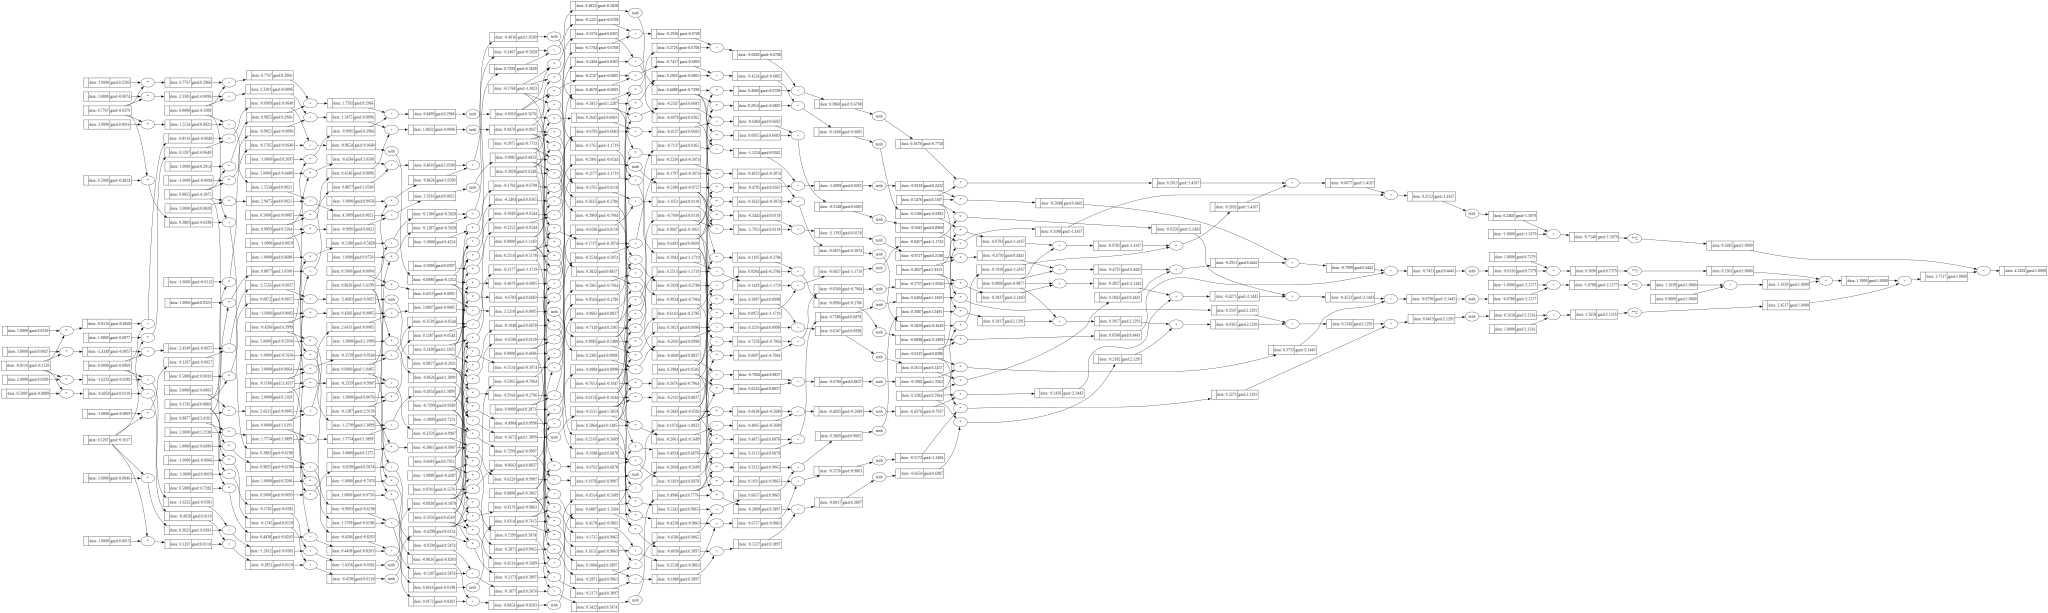

In [22]:
loss.backward()
draw_dot(loss)

In [23]:
m.layers[0].neurons[1].w[1].grad

-0.30748497689614196

Remember that we want to **minimize** the loss, so we need to **substract** the gradient.

Now, we need to add a mechanisms to track which nodes contains values that can be updated, in contrast with input nodes and temporary nodes.

In [24]:
import random

class Neuron:    
    def __init__(self, nin):
        self.w = [Value(random.uniform(-1, 1)) for _ in range(nin)]
        self.b = Value(random.uniform(-1, 1))
        
    def __call__(self, x):
        # return tanh(w * x + b)
        act = sum((wi * xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    

class Layer:    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs if len(outs) > 1 else outs[0]
    
    def parameters(self):
        return [p for n in self.neurons for p in n.parameters()]
    

class MLP:    
    def __init__(self, nin, nout):
        sz = [nin] + nout
        self.layers = [Layer(zi, zo) for zi, zo in zip(sz, sz[1:])]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for l in self.layers for p in l.parameters()]


In [25]:
m = MLP(3, [4, 4, 1])
m.parameters()

[Value(, data=-0.12861365321409246, grad=0.0),
 Value(, data=-0.9367339965304997, grad=0.0),
 Value(, data=0.2840668005988307, grad=0.0),
 Value(, data=-0.4117708775844171, grad=0.0),
 Value(, data=-0.38514671265153844, grad=0.0),
 Value(, data=-0.12775205347802387, grad=0.0),
 Value(, data=-0.19059160944889286, grad=0.0),
 Value(, data=0.35659856104911514, grad=0.0),
 Value(, data=-0.4302594344302333, grad=0.0),
 Value(, data=-0.5833150888422678, grad=0.0),
 Value(, data=0.9647040920082111, grad=0.0),
 Value(, data=0.6127316223108161, grad=0.0),
 Value(, data=0.9632596943097624, grad=0.0),
 Value(, data=-0.06883684707218918, grad=0.0),
 Value(, data=0.7947929360438555, grad=0.0),
 Value(, data=0.3353423321140432, grad=0.0),
 Value(, data=-0.29528904920464005, grad=0.0),
 Value(, data=-0.9451978631523603, grad=0.0),
 Value(, data=-0.09180100249128986, grad=0.0),
 Value(, data=-0.2620031046629616, grad=0.0),
 Value(, data=0.11983807007118719, grad=0.0),
 Value(, data=-0.8302114230096347

In [26]:
for l in m.layers:
    print(len(l.parameters()))
print("-"*10)
print(len(m.parameters()))

16
20
5
----------
41


layer1: 3 * 4 + 4

layer2: 4 * 4 + 4

layer3: 4 * 1 + 1

In [27]:
ypred = [m(x) for x in xs]
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
print(loss)

for p in m.parameters():
    p.grad = 0
loss.backward()

learning_rate = 0.01
for p in m.parameters():
    p.data -= learning_rate * p.grad

    
ypred = [m(x) for x in xs]
loss = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
print(loss)

Value(, data=5.611686301118484, grad=0.0)
Value(, data=5.556744823877593, grad=0.0)


What about the learning rate?

In [28]:
def test_learning_rate(learning_rate):
    m = MLP(3, [4, 4, 1])
    ypred = [m(x) for x in xs]
    loss1 = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])

    for p in m.parameters():
        p.grad = 0
    loss1.backward()

    for p in m.parameters():
        p.data -= learning_rate * p.grad
        
    ypred = [m(x) for x in xs]
    loss2 = sum([(yout-ygt)**2 for ygt, yout in zip(ys, ypred)])
    print(loss1.data, loss2.data)

In [29]:
test_learning_rate(0.01)

3.995543688534072 3.2577287623945983


In [30]:
test_learning_rate(0.1)

6.496601745355797 6.550647623009929


In [31]:
test_learning_rate(1)

11.01173103660882 7.722879214632526


In [32]:
test_learning_rate(10)

4.846856400979322 8.0


# Example 1. Simple dataset

In [ ]:
xs = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0],
]

# Each sample input has one desired output that we want our MLP to predict

ys = [1.0, -1.0, -1.0, 1.0] # desired predictions

In [ ]:
P = MLP(3, [4, 4, 1])

In [ ]:
# Writing out the training loop

epochs = 20
learning_rate = 0.1

for i in range(epochs):

    # forward pass
    y_predicted = [P(x) for x in xs]

    # recalculate loss
    loss = sum([(y_output - y_ground_truth)**2 for y_ground_truth, y_output in zip(ys, y_predicted)])

    # backward pass
    
    # COMMON BUG: Forgetting to zero-out your gradients before
    # running the next backward pass
    
    for p in P.parameters():
        p.grad = 0
    y_predicted = [P(x) for x in xs]
    loss.backward()

    # gradient updates
    for p in P.parameters():
        p.data += -learning_rate * p.grad
        
    # print current loss
    print(f'i={i}: loss={loss}')

In [ ]:
y_predicted, ys